# Experiment description
 - Let's generate random samples from highly skewed distribution with long tails
 - Calculate & store median value of each random sample
 - Calculate value of general median over the entire array (concatenation of random samples)
 - Estimate general median as median of medians
 - Compare results
 ____
 
## 1. Log normal distribution -- good candidate
  - it looks like $\exp^{ \mu + \sigma^{2} * Z}$, where Z - standard normal distribution N(0,1)
  - it's highly skewed
  - median is just $\exp^{\mu}$
  - average is just $\exp^{\frac{\sigma^{2}}{2}}$
  - so we can arbitrary choose parameters $\mu$ and $\sigma$ and test the ideas

In [1]:
import numpy as np

In [2]:
def genLogNormal(mu, sigma, size):
    return np.random.lognormal(mu, sigma, size)

In [3]:
mu = 5
sigma = np.sqrt(10)
np.random.seed(42) # fixate random seed to make experiment reproducible

q = 0.5
# Theoretical median = exp(5) = 148 (approx.)
# Theoretical mean = exp(5+10/2) = 22026 (approx.)

In [4]:
def getQuantile(arr, x=0.5):
    return np.quantile(arr, x)

In [5]:
def getMean(arr):
    return np.mean(arr)

## 2. Emulation of incoming latency values

In [6]:
numRandomSamples = 50000
sampleSize = 1000

medians = []
means = []
finalArray = []

for i in range(numRandomSamples):
    arr = genLogNormal(mu, sigma, sampleSize).astype(np.uint32) # uint32 because we kind of pretenting that these values are latencies
    medians.append(getQuantile(arr, q))
    means.append(getMean(arr))
    finalArray.append(arr)
finalArray = np.concatenate(finalArray)
print(finalArray.shape)

(50000000,)


## 3. Estimation of mean/median

Note: mean of means is equal to general mean because all random samples has the same number of elements

In [7]:
generalMedian = getQuantile(finalArray, q)
generalMean = getMean(finalArray)
generalMean, generalMedian

(21879.0340359, 148.0)

In [8]:
medianOfMedians = getQuantile(np.array(medians), 0.5)
medianOfMeans = getMean(np.array(means))
medianOfMeans, medianOfMedians

(21879.034035899997, 148.0)

## 4. Visualization

In [9]:
import matplotlib.pylab as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

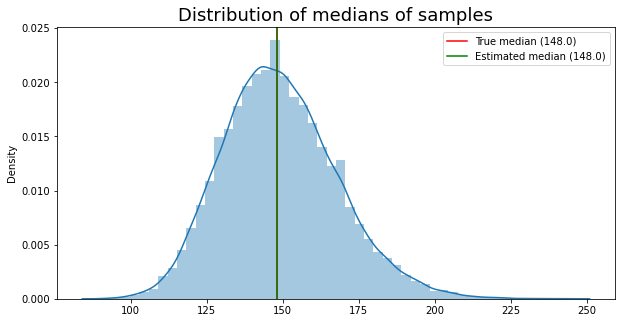

In [10]:
fig = plt.figure(figsize=(10,5))
sns.distplot(medians)
plt.axvline(generalMedian, color='red', label=f'True median ({generalMedian})')
plt.axvline(medianOfMedians, color='green', label=f'Estimated median ({medianOfMedians})')
plt.title("Distribution of medians of samples", fontsize=18)
plt.legend()